# 0. The Obligatory Part

In [ ]:
# Run this cell if data in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install ortools
!pip3 install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 27.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.2

In [ ]:
# Import library
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

# 1. Define the Data Structure

In [ ]:
# Data path
new_employee_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/new_employee.csv'
new_task_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/new_task_1.csv'

## 1.1. Pre-Processing: Employee Data

In [ ]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col='employee_id')
employee_skills_df.drop(columns=['no', 'Role'], inplace=True, errors='ignore')

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[1:].tolist()

employee_skills_df

,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
employee_id,,,,,,,,,,,,,,,,,,,,,
Talent 1,1,1,2,1,2,3,3,2,2,2,...,1,1,1,2,1,1,1,1,1,2
Talent 2,4,4,4,4,3,5,4,3,3,3,...,3,2,1,1,1,1,1,1,1,1
Talent 3,3,2,2,3,2,3,3,2,2,3,...,3,3,3,3,2,3,2,3,3,2
Talent 4,3,2,3,2,3,4,3,2,4,2,...,3,1,1,2,2,2,2,2,2,2
Talent 5,2,1,3,1,1,1,2,1,1,2,...,2,1,1,3,2,5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Talent 108,3,3,3,3,4,2,2,2,2,3,...,4,3,4,2,3,3,2,2,3,2
Talent 109,5,5,4,5,3,4,4,3,3,3,...,5,5,5,5,5,5,5,5,5,5
Talent 110,3,3,3,3,3,4,4,4,3,4,...,3,3,3,4,4,3,4,3,4,3


## 1.2. Pre-Processing: Task Data

In [ ]:
task_df = pd.read_csv(new_task_path, index_col='task_id')

tasks = task_df.index.tolist()
company_names = list(set(task_df['project_id']))
story_points = task_df['story_points'].to_dict()

task_df

,project_id,story_points,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,
T1,P5,8,5,1,4,4,4,4,3,5,...,4,1,4,2,3,5,4,5,5,5
T2,P1,1,5,5,5,1,5,3,1,2,...,3,4,3,1,1,1,4,1,3,3
T3,P5,2,5,4,5,1,5,4,5,2,...,2,4,3,5,4,2,3,4,2,5
T4,P1,3,3,1,2,1,5,4,3,1,...,4,1,1,4,1,4,1,3,2,1
T5,P2,5,1,4,5,5,2,3,5,5,...,3,5,1,3,1,5,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T296,P5,5,4,5,4,4,3,1,4,3,...,3,3,1,5,5,3,3,5,5,3
T297,P2,8,4,3,5,2,2,2,2,4,...,4,4,4,5,2,1,3,5,5,5
T298,P2,2,2,2,5,2,4,2,5,2,...,5,1,2,2,5,4,3,2,5,4


In [ ]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
  company_tasks[company] = task_df[task_df['project_id'] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient='index')
company_tasks_df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
P1,T2,T4,T14,T21,T26,T29,T30,T36,T38,T40,...,None,None,None,None,None,None,None,None,None,None
P2,T5,T6,T9,T11,T19,T28,T32,T33,T44,T46,...,T260,T265,T274,T279,T283,T291,T293,T297,T298,T299
P3,T10,T23,T24,T25,T34,T48,T53,T58,T59,T68,...,T285,T286,T287,T289,T300,None,None,None,None,None
P4,T15,T20,T35,T37,T39,T43,T56,T57,T61,T70,...,None,None,None,None,None,None,None,None,None,None
P5,T1,T3,T7,T8,T12,T13,T16,T17,T18,T22,...,T241,T242,T243,T268,T276,T280,T282,T288,T296,None


## 1.3. Pre-Processing: Competency Assesment

# 2. Construct the Model

In [ ]:
model = cp_model.CpModel()

# 3. Build the Decision Variable

We have 3 sets
$$
sets=\begin{cases}I\:&,\:set\:of\:task\\ J&,\:set\:of\:employee\\ K&,\:set\:of\:project\end{cases}
$$

then we have parameters, scalars, and data structures. so let:
$$
i=\:task \:i \\
j=employee \:j\\
k=projects \:k\\
s_i=story\:points\:of\:task \:i \\
e_{ij}=similarity\:skills\:of\:employee\:j\:for\:task\:i \\
$$



Decision Variable

$$
x_{ijk}=Binary\:variable\:indicating\:whether\:employee\:j\:is\:assigned\:to\:task\:k\:for\:day\:i
$$
$$
y_{jk}=Binary\:variable\:indicating\:whether\:employee\:j\:is\:assigned\:to\:any\:task\:from\:company\:k
$$

In [ ]:
max_employee_workload = 20

In [ ]:
# Create decision variables for x and y
x = {}
for k, task in company_tasks.items():
    for i in task:
        for j in employees:
            x[(i, j, k)] = model.NewIntVar(0, 1, f'x_{i}_{j}_{k}')

# decision variable y represent cardinility of each employee and company
y = {}
for j in employees:
    for k in company_tasks.keys():
        y[(j, k)] = model.NewIntVar(0, 1, f'y_{j}_{k}')

# decision variables max_workload
max_workload = model.NewIntVar(0, max_employee_workload, 'max_workload')

In [ ]:
print(x)
print(y)

{('T2', 'Talent 1', 'P1'): x_T2_Talent 1_P1(0..1), ('T2', 'Talent 2', 'P1'): x_T2_Talent 2_P1(0..1), ('T2', 'Talent 3', 'P1'): x_T2_Talent 3_P1(0..1), ('T2', 'Talent 4', 'P1'): x_T2_Talent 4_P1(0..1), ('T2', 'Talent 5', 'P1'): x_T2_Talent 5_P1(0..1), ('T2', 'Talent 6', 'P1'): x_T2_Talent 6_P1(0..1), ('T2', 'Talent 7', 'P1'): x_T2_Talent 7_P1(0..1), ('T2', 'Talent 8', 'P1'): x_T2_Talent 8_P1(0..1), ('T2', 'Talent 9', 'P1'): x_T2_Talent 9_P1(0..1), ('T2', 'Talent 10', 'P1'): x_T2_Talent 10_P1(0..1), ('T2', 'Talent 11', 'P1'): x_T2_Talent 11_P1(0..1), ('T2', 'Talent 12', 'P1'): x_T2_Talent 12_P1(0..1), ('T2', 'Talent 13', 'P1'): x_T2_Talent 13_P1(0..1), ('T2', 'Talent 14', 'P1'): x_T2_Talent 14_P1(0..1), ('T2', 'Talent 15', 'P1'): x_T2_Talent 15_P1(0..1), ('T2', 'Talent 16', 'P1'): x_T2_Talent 16_P1(0..1), ('T2', 'Talent 17', 'P1'): x_T2_Talent 17_P1(0..1), ('T2', 'Talent 18', 'P1'): x_T2_Talent 18_P1(0..1), ('T2', 'Talent 19', 'P1'): x_T2_Talent 19_P1(0..1), ('T2', 'Talent 20', 'P1'): x_

# 4. Subject to the Constraint

## Constraint 1: Each task is assigned to one employee
$$
\sum _{j\in J}\:x_{ijk}\:=\:1 \quad \forall i \in k, j \in J, k \in K
$$

In [ ]:
# constraint 1: each task assigned to one talent
for k, task in company_tasks.items():
    for i in task:
        model.Add(sum(x[(i, j, k)] for j in employees) == 1)

## Constraint 2: Each employee works for one company at a time
$$
Pre-Constraint\:2:\sum _{i\in I_k}x_{ijk}>0\:\rightarrow \:y_{jk}=1\:\forall j\in J,\:\forall k\in K\:
$$

In [ ]:
# pre-processing constraint 2
for j in employees:
    for k, task in company_tasks.items():
        # Create a temporary list to hold the sum of x[i][j][k] for all i
        temp_sum = []
        for i in task:
            temp_sum.append(x[(i, j, k)])
        # Add a constraint to the model: y[j][k] is 1 if the sum of x[i][j][k] for all i is > 0, and 0 otherwise
        model.Add(sum(temp_sum) > 0).OnlyEnforceIf(y[(j, k)])
        model.Add(sum(temp_sum) <= 0).OnlyEnforceIf(y[(j, k)].Not())

$$
Constraint\:2:\sum _{k\in K}y_{jk}\le 1\:\forall j\in J,k\in K\:
$$

In [ ]:
# create constraint 2: each employee can only work on one task
for j in employees:
    # The sum of y[j][k] for all companies (k) should be <= 1
    model.Add(sum(y[(j, k)] for k in company_tasks.keys()) <= 1)

## Constraint 3: Employee workload doesn't exceed the capacity
$$
Constraint\:3:\:\sum _{j\in J}s_i\cdot x_{ijk}\le 20\:\forall i\in k,j\in J, k\in K\:
$$

In [ ]:
# constraint 3: employee workload doesn't exceed the capacity
for j in employees:
  model.Add(sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks) <= max_employee_workload)

## Constraint 4: Maximum workload is greater than or equal to the workload of each employee
$$
Constraint\:4:\:maxworkload\ge \sum _{i,\:k}s_i\cdot x_{i,j,k},\:\forall j\in J\:\:
$$

In [ ]:
# constraint 4: max_workload is greater than or equal to the workload of each employee
for j in employees:
    model.Add(max_workload >= sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks))

# 5. Single Objective 1: Minimize the Idle Employee

## 5.1. Set the Objective Model

## Single Objective Minimize Idle Employee
$$
min.\:I_j=\sum _{j\in \:J}\:\left(1\:-\:\sum _{k\in \:K}\:y_{jk}\right)\quad \: \forall j\in J, k\in K\quad \tag{1}
$$

In [ ]:
# objective 1
I = []

for j in employees:
  obj1 = 1 - sum(y[j, k] for k in company_tasks.keys())
  I.append(obj1)

I_total_idle_employee = sum(I)

# single objective 1
model.Minimize(I_total_idle_employee)

## 5.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {cosine_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(cosine_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 0.0

Total Idle Employees: 0
Task T20 assigned to Employee Talent 1
Company			: P4
Story Points		: 3
Similarity score	: 0.8842867987

Task T96 assigned to Employee Talent 1
Company			: P4
Story Points		: 3
Similarity score	: 0.8163779811

Task T123 assigned to Employee Talent 1
Company			: P4
Story Points		: 1
Similarity score	: 0.8617254799

Task T136 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8298799389

Task T151 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8438168544

Task T156 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8526269798

Task T196 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8046457373

Task T199 assigned to Employee Talent 1
Company			: P4
Story Points		: 3
Similarity score	: 0.8544893111

Task T225 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 

## 5.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result1 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result1.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result1

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P4, P4, P4, P4, P4, P4, P4, P4, P4]","[T20, T96, T123, T136, T151, T156, T196, T199,...",20,0,"[0.8842867987291562, 0.8163779811486327, 0.861..."
Talent 2,"[P5, P5]","[T51, T209]",13,7,"[0.8086941541581738, 0.8516190290135685]"
Talent 3,"[P5, P5, P5, P5, P5, P5]","[T78, T130, T133, T194, T268, T280]",20,0,"[0.8742917581208043, 0.8629409583559434, 0.890..."
Talent 4,"[P5, P5, P5]","[T7, T16, T17]",16,4,"[0.8845379626717031, 0.8114270171236219, 0.808..."
Talent 5,"[P2, P2, P2, P2, P2]","[T32, T63, T135, T229, T235]",20,0,"[0.6624901934851648, 0.7255621756487035, 0.706..."
Talent 6,"[P4, P4, P4, P4, P4, P4, P4, P4, P4]","[T37, T85, T185, T217, T240, T247, T253, T261,...",19,1,"[0.895484045813936, 0.8833854363715359, 0.8792..."
Talent 7,[P2],[T117],5,15,[0.9202991701379599]
Talent 8,"[P1, P1, P1, P1]","[T14, T75, T87, T206]",15,5,"[0.8889122555314883, 0.9171007868679708, 0.914..."
Talent 9,"[P5, P5, P5, P5]","[T12, T27, T77, T132]",15,5,"[0.806362114073248, 0.8218707213170614, 0.8426..."


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 112
Total Active Employee		: 112	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



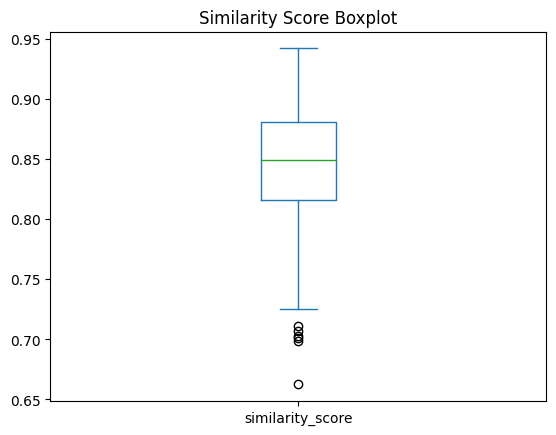

In [ ]:
# make boxplot for objective 1 variable from the similarity score
similarity_score1 = result1['similarity_score'].explode().reset_index(drop=True)
similarity_score1.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

# 6. Single Objective 2: Maximize the Similarity Error

## 6.1. Set the Objective Model

## Single Objective Maximize Similarity Score
$$
max.\:E_{ij}=\sum_{i\in I}\:\sum _{j\in J}\:e_{ij}\cdot x_{ijk}\quad \:\:\forall \:i\in k, \:j \in J, \:k \in K\quad\tag{2}
$$

In [ ]:
# objective 2
# E_total_similarity_score = 0

for k, tasks in company_tasks.items():
  E_total_similarity_score = sum(cosine_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)


model.Maximize(E_total_similarity_score)


# E_total_similarity_score = []

# for k, tasks in company_tasks.items():
#   for j in employees:
#     obj2 = sum(cosine_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)
#     E_total_similarity_score.append(obj2)

# model_2.Maximize(E_total_similarity_score)

## 6.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {cosine_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(cosine_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 59.07315353891596

Total Similarity Score: 59.07315353891596

Task T15 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8697150541

Task T56 assigned to Employee Talent 1
Company			: P4
Story Points		: 8
Similarity score	: 0.8885435009

Task T94 assigned to Employee Talent 1
Company			: P4
Story Points		: 3
Similarity score	: 0.8656630597

Task T156 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8526269798

Task T186 assigned to Employee Talent 1
Company			: P4
Story Points		: 5
Similarity score	: 0.8514778711

Task T29 assigned to Employee Talent 2
Company			: P1
Story Points		: 3
Similarity score	: 0.8982939463

Task T105 assigned to Employee Talent 2
Company			: P1
Story Points		: 2
Similarity score	: 0.8144180418

Task T107 assigned to Employee Talent 2
Company			: P1
Story Points		: 3
Similarity score	: 0.8337694689

Task T206 assigned to Employee Talent 2
Company			: P1
Story 

## 6.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result2 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result2.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result2

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P4, P4, P4, P4, P4]","[T15, T56, T94, T156, T186]",20,0,"[0.8697150541364781, 0.8885435008665881, 0.865..."
Talent 2,"[P1, P1, P1, P1, P1]","[T29, T105, T107, T206, T248]",14,6,"[0.8982939463371729, 0.8144180418236883, 0.833..."
Talent 3,[P5],[T52],5,15,[0.9316938603790693]
Talent 4,"[P4, P4, P4, P4, P4, P4, P4, P4, P4]","[T70, T84, T106, T123, T136, T199, T217, T253,...",19,1,"[0.8485685223716418, 0.8815680414386748, 0.864..."
Talent 5,"[P4, P4, P4, P4, P4, P4]","[T35, T57, T98, T196, T225, T267]",18,2,"[0.7519248427622244, 0.7941753510253406, 0.770..."
Talent 6,[P5],[T175],2,18,[0.9058258122447812]
Talent 7,[P5],[T12],8,12,[0.9093437879790974]
Talent 8,"[P5, P5, P5, P5]","[T72, T169, T207, T243]",16,4,"[0.9084891549085885, 0.9336091544332098, 0.901..."
Talent 9,"[P2, P2, P2]","[T157, T165, T167]",15,5,"[0.7982941757130334, 0.8246263282986802, 0.871..."


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 112
Total Active Employee		: 109	97.32%
Total Idle Employee		: 3	2.68%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



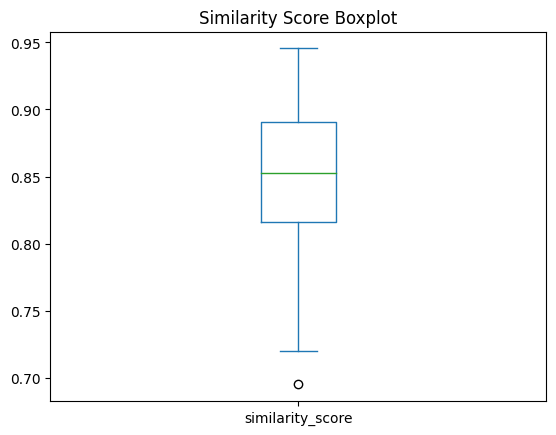

In [ ]:
# make boxplot for objective 2 variable from the similarity score
similarity_score2 = result2['similarity_score'].explode().reset_index(drop=True)
similarity_score2.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

# 7. Single Objective 3: Balancing Workload

## 7.1 Set The Objective Model

## Single Objective Balancing Workload Employee

In [ ]:
model.Minimize(max_workload)

## 7.2 Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

## 7.3 Print the Result

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {cosine_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(cosine_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 11.0

Total Similarity Score: 55.285886415167894

Task T64 assigned to Employee Talent 1
Company			: P5
Story Points		: 8
Similarity score	: 0.8057319054

Task T130 assigned to Employee Talent 1
Company			: P5
Story Points		: 1
Similarity score	: 0.8740309367

Task T211 assigned to Employee Talent 1
Company			: P5
Story Points		: 1
Similarity score	: 0.8084666403

Task T250 assigned to Employee Talent 2
Company			: P1
Story Points		: 8
Similarity score	: 0.8594645996

Task T266 assigned to Employee Talent 2
Company			: P1
Story Points		: 3
Similarity score	: 0.8337406536

Task T2 assigned to Employee Talent 3
Company			: P1
Story Points		: 1
Similarity score	: 0.8672879789

Task T75 assigned to Employee Talent 3
Company			: P1
Story Points		: 3
Similarity score	: 0.9154157754

Task T122 assigned to Employee Talent 3
Company			: P1
Story Points		: 2
Similarity score	: 0.8890210966

Task T273 assigned to Employee Talent 3
Company			: P1
Story Points		: 2


In [ ]:
# Convert dictionary to DataFrame
result3 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result3.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result3

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P5, P5, P5]","[T64, T130, T211]",10,10,"[0.8057319054382739, 0.8740309367296206, 0.808..."
Talent 2,"[P1, P1]","[T250, T266]",11,9,"[0.8594645995661493, 0.8337406535549821]"
Talent 3,"[P1, P1, P1, P1, P1]","[T2, T75, T122, T273, T292]",10,10,"[0.8672879788626712, 0.9154157754126684, 0.889..."
Talent 4,"[P1, P1]","[T179, T239]",11,9,"[0.8340678929827798, 0.8798880341827362]"
Talent 5,"[P1, P1, P1]","[T41, T171, T252]",9,11,"[0.7790545427847231, 0.7260315851363409, 0.698..."
Talent 6,"[P1, P1]","[T87, T222]",10,10,"[0.907437529286688, 0.8705928958465434]"
Talent 7,"[P1, P1]","[T36, T55]",10,10,"[0.9299685520993887, 0.9012755962110227]"
Talent 8,"[P2, P2, P2, P2]","[T47, T114, T140, T200]",10,10,"[0.8988136671121922, 0.9231137651069911, 0.909..."
Talent 9,"[P2, P2, P2]","[T67, T69, T283]",11,9,"[0.8178955692104433, 0.827246226274137, 0.8637..."


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 112
Total Active Employee		: 112	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



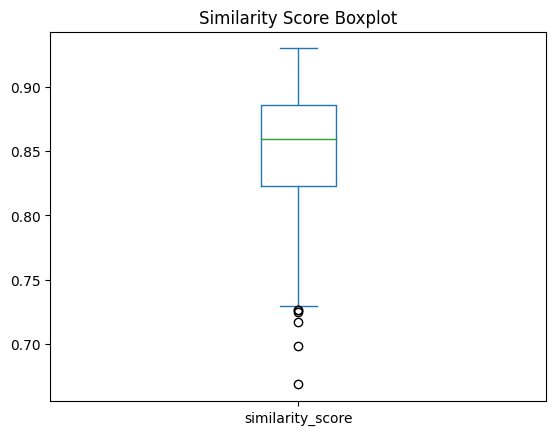

In [ ]:
# make boxplot for objective 3 variable from the similarity score
similarity_score3 = result3['similarity_score'].explode().reset_index(drop=True)
similarity_score3.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

# Boxplot Visualization 3 Single Objective

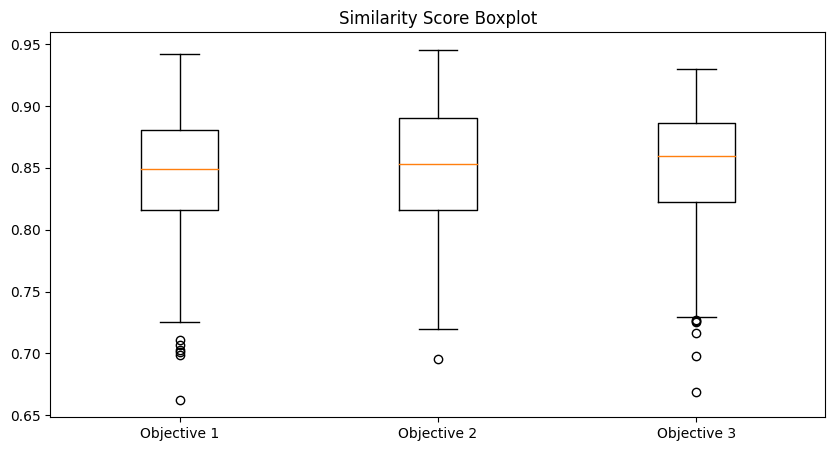

In [ ]:
# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3], labels=['Objective 1', 'Objective 2', 'Objective 3'])
plt.title('Similarity Score Boxplot')
plt.show()

# 8. Multi-Objective Approach

## 8.1. Set The Objective Model

## Multi Objective Approach

$$
min.\:W=\alpha \cdot min.\:I_j+\beta \cdot max.\:E_{ij} \quad \tag{3}
$$

In [ ]:
alpha = 0.1
beta = 0.1
theta = 0.8

In [ ]:
# objective 1
# I = []

# for j in employees:
#   obj1 = 1 - sum(y[j, k] for k in company_tasks.keys())
#   I.append(obj1)

# I_total_idle_employee = sum(I)

# # objective 2
# for k, tasks in company_tasks.items():
#   E_total_similarity_score = sum(cosine_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)

model.Minimize((alpha * I_total_idle_employee) + (beta * E_total_similarity_score) + (theta * max_workload))

## 8.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')
  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {cosine_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(cosine_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 13.638942516135963

Total Idle Employees: 0
Total Similarity Score: 48.389425161360926

Task T43 assigned to Employee Talent 1
Company			: P4
Story Points		: 3
Similarity score	: 0.8511604308

Task T99 assigned to Employee Talent 1
Company			: P4
Story Points		: 1
Similarity score	: 0.8293310079

Task T102 assigned to Employee Talent 1
Company			: P4
Story Points		: 5
Similarity score	: 0.8113288810

Task T156 assigned to Employee Talent 1
Company			: P4
Story Points		: 2
Similarity score	: 0.8526269798

Task T34 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	: 0.8074278511

Task T53 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	: 0.8163978375

Task T120 assigned to Employee Talent 2
Company			: P3
Story Points		: 5
Similarity score	: 0.8433367357

Task T300 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	: 0.8325770071

Task T46 assigned to Employee Talen

## 8.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result4 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result4.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result4

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P4, P4, P4, P4]","[T43, T99, T102, T156]",11,9,"[0.851160430811792, 0.8293310078558751, 0.8113..."
Talent 2,"[P3, P3, P3, P3]","[T34, T53, T120, T300]",11,9,"[0.8074278510672771, 0.8163978374557036, 0.843..."
Talent 3,"[P2, P2]","[T46, T161]",11,9,"[0.8918465515396763, 0.9215413451041381]"
Talent 4,"[P1, P1]","[T75, T87]",11,9,"[0.8604801016040484, 0.8622039152382275]"
Talent 5,"[P5, P5, P5, P5, P5, P5, P5]","[T8, T16, T31, T45, T60, T143, T168]",11,9,"[0.7387584825697658, 0.6514690934374113, 0.736..."
Talent 6,"[P3, P3]","[T173, T270]",11,9,"[0.89077263082632, 0.875555705704209]"
Talent 7,"[P4, P4]","[T82, T215]",10,10,"[0.9087888875372514, 0.911199628751851]"
Talent 8,"[P1, P1, P1]","[T239, T248, T257]",11,9,"[0.8966957255903818, 0.9054488808885112, 0.873..."
Talent 9,[P5],[T110],5,15,[0.7826492633734211]


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 112
Total Active Employee		: 112	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



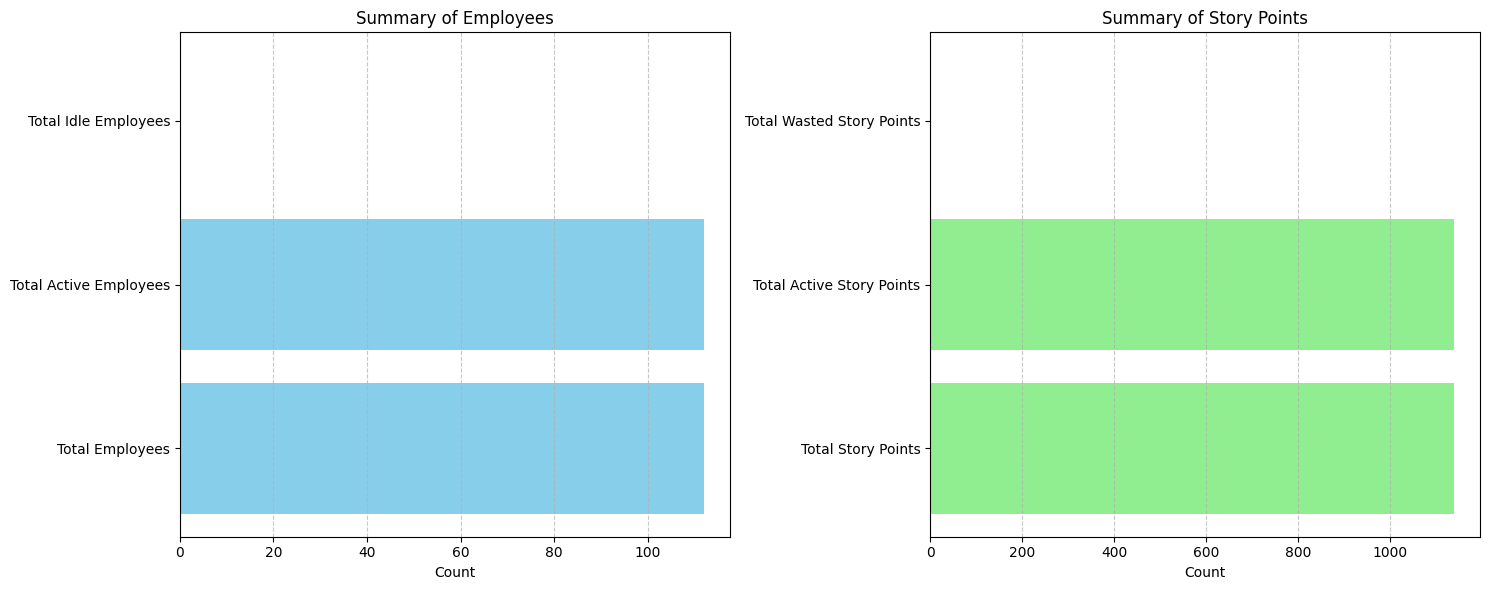

In [ ]:
# Data for employees
employee_labels = ['Total Employees', 'Total Active Employees', 'Total Idle Employees']
employee_values = [total_employee, total_active_employee, total_idle_employee]

# Data for story points
sp_labels = ['Total Story Points', 'Total Active Story Points', 'Total Wasted Story Points']
sp_values = [total_sp, total_active_sp, total_wasted_sp]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for employees
ax1.barh(employee_labels, employee_values, color='skyblue')
ax1.set_xlabel('Count')
ax1.set_title('Summary of Employees')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot for story points
ax2.barh(sp_labels, sp_values, color='lightgreen')
ax2.set_xlabel('Count')
ax2.set_title('Summary of Story Points')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

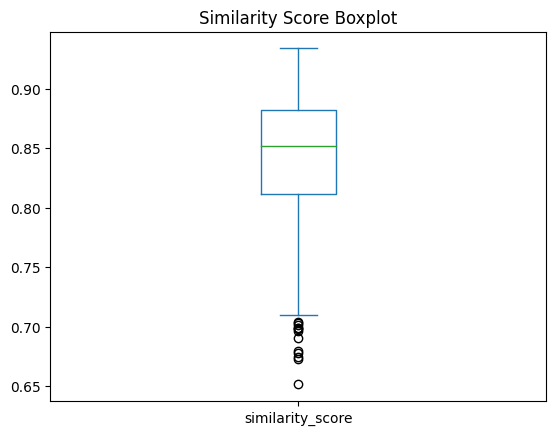

In [ ]:
# make boxplot for multi objective variable from the similarity score
similarity_score_multi = result4['similarity_score'].explode().reset_index(drop=True)
similarity_score_multi.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

# Boxplot Visualization

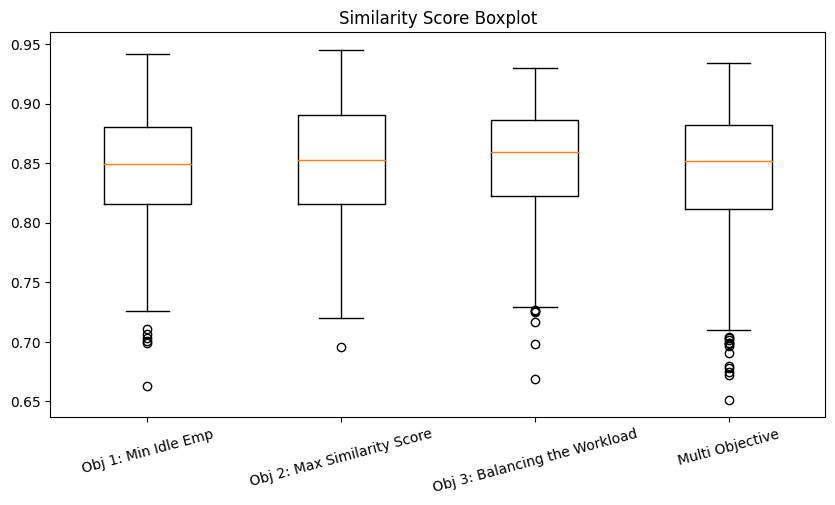

In [ ]:
# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3, similarity_score_multi],
            labels=['Obj 1: Min Idle Emp', 'Obj 2: Max Similarity Score', 'Obj 3: Balancing the Workload', 'Multi Objective'])
plt.title('Similarity Score Boxplot')
plt.xticks(rotation=15)
plt.show()

# 9. Strategic Analysis

## Single Objective -

In [ ]:
## Single Objective -